# Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import tqdm
import random
import datetime
from sklearn.metrics import mean_squared_log_error
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow.keras.backend as K
from datetime import datetime
import calendar
import itertools
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import read_csv
from numpy import nan
from numpy import isnan
from numpy import split
from numpy import array
from matplotlib import pyplot
import xlrd
from collections import defaultdict
from datetime import date,datetime
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import copy
from scipy import stats
import time
from pylab import *
plt.rcParams['font.sans-serif'] = ['SimHei']
import argparse
from scipy.special import softmax
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import os
from math import sqrt
from numpy import concatenate
from pandas import DataFrame
from pandas import concat
#导入scipy模块
from scipy import stats
import joblib
import stats as sts#df2
#%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras import optimizers
import torch
import torch.nn as nn


Bad key "nbagg.transparent" on line 426 in
D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 509 in
D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_args" on line 512 in
D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution
In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.

# Load data

In [2]:
abc=30#表示30min为一段
gdf0=pd.read_csv(r'F:\博士科研资料\博士开题及其素材\加油站数据\export11.csv',encoding='gb18030')
gdf0['Time1'] = pd.to_datetime(gdf0['Time'],errors='coerce') 
gdf0['Hour'] = gdf0['Time1'].dt.hour.fillna(0).astype("int")    #转化提取小时
gdf0['Minute'] = gdf0['Time1'].dt.minute.fillna(0).astype("int") #转化提取分钟
gdf0['Hour']=gdf0['Hour'].astype(str)
gdf0['Date'] = pd.to_datetime(gdf0['Date'])
gdf0['T'] = gdf0['Hour'].apply(lambda x : int(x))+gdf0['Minute'].apply (lambda x :round(x/60,2))
gdf0['volume'] = gdf0['volume']
gdf0['MinuteLabel']=gdf0['Hour'].apply(lambda x : math.floor((int(x)*60)/abc))+gdf0['Minute'].apply (lambda x :math.floor(x/abc))#表示该时刻点属于哪个区间,因为有0，所以向下取整数
day_name00=gdf0.groupby(["NAME"])         #
for name,group in day_name00:#group是星期数一样的类目
    if name=='92H':
        df0=group
df0=df0[df0['Date'] >= "2020-06-01"] 
#display(df0.head(25))
print('00df0.shape[0]',df0.shape[0])
df0= df0[~( df0['Date'].isin(["2020-06-11","2020-08-11", "2020-08-25", "2020-09-11"]) )]###删除这些行，因为很多0
print('11df0.shape[0]',df0.shape[0])

00df0.shape[0] 209937
11df0.shape[0] 207441


# Data preprogressing

In [3]:
DFStockOut=df0.iloc[:,[6,7,11,3,10,12]]
c=3
a=DFStockOut.shape[1]
ReStartStock=13790#10000#该变量表示补货到达后的初始库存
DFStockOut['OurLeaveStock']=DFStockOut['Date'].apply(lambda x : ReStartStock)#6
DFStockOut['OurBuHuoStart']=DFStockOut['Date'].apply(lambda x : 0)#补货触发时刻7
b=a+1
DFStockOut['Date']=pd.to_datetime(DFStockOut['Date'])
StockOutTime=[]
DHCS1=0#表示订货次数
DFStockOut['AllMinutes']=DFStockOut['MinuteLabel'].apply(lambda x: time.strftime("%H:%M:%S", time.gmtime( float((x+1)*abc*60))))
for i in range(DFStockOut.shape[0]):
    if DFStockOut.iloc[i,-1]=="00:00:00":
        DFStockOut.iloc[i,-1]="23:59:00"  ###1月20日0:00:00表示的是1月20日24:00:00,而无法取24h，所以设为23.59    
DFStockOut['timestamp']=DFStockOut['Date'].astype('str')+ ' ' + DFStockOut['AllMinutes'].astype('str')
DFStockOut['timestamp'] = pd.to_datetime(DFStockOut['timestamp'])#pd.to_datetime它无法转换
print(DFStockOut.shape)#(321121, 9)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

(207441, 10)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
df2 = df0.groupby(["Date","MinuteLabel"])['volume'].sum().reset_index(name ='UnitSales')#只留下小时销量数据
df2['Date'] = pd.to_datetime(df2['Date']) 
df2['Month_id']=df2['Date'].dt.month
df2['weekday'] = df2['Date'].apply(lambda time: time.dayofweek)
df2['MinuteLabel']=df2['MinuteLabel'].astype(str)
df2['weekday_hour'] = df2.weekday.astype(str) +' '+ df2.MinuteLabel.astype(str)
df2['m_weekday'] = df2.weekday_hour.replace(df2[:].groupby('weekday_hour')['UnitSales'].mean().to_dict())
init1 = df2.m_weekday[:].apply(np.log).values#均值取对数df5['UnitSales'
df2['PreproccessUnitSales'] =df2.UnitSales[:].apply(np.log).values - init1#数取对数-均值的对数
dfghu=df2.sort_values(by=['UnitSales'],ascending=[True]) 
df2['UnitSales']=df2['UnitSales'].apply(lambda x: (x-dfghu.iloc[0,2])/(dfghu.iloc[dfghu.shape[0]-1,2]-dfghu.iloc[0,2]))

In [8]:
df2['MinuteLabel']=df2['MinuteLabel'].astype(int)#
idx=list(range(0,int(24*60/abc)))                                                         
i=0
colorSet=['cyan','g','palegreen','c','lime','tomato','r']
DayName=['Mony','Tues','Wednes', 'Thurs', 'Fri', 'Satur', 'Sun']
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_name=df2.groupby(["weekday"])         #
for name,group in day_name:#group是星期数一样的类目
    group1=group.groupby(["Date"])
    j=0
    for name,group2 in group1:#group2是星期数、日期数一样的类目，即一天  
         group2=group2.sort_values(by=['MinuteLabel'],ascending=True,na_position='first')  # 按时间排序                  
         group2 = group2.set_index('MinuteLabel')#group2设置索引为Hour         
         group2 = group2.reindex(idx, fill_value=0)
         group2['MinuteLabel'] = group2.index          
         group2['Date']=name    
         group2['weekday'] = group2['Date'].apply(lambda time: time.dayofweek)
         group2['day_name']=group2['weekday'].apply (lambda x : days[x])
         if i==0 and j==0:
            df3=group2
         else:      
            df3=pd.concat([df3,group2], axis=0, ignore_index=True)#axis:合并方式，默认0表示按列合并，1表示按行合并;ignore_index:是否忽略索引                   
         j=j+1
    i=i+1
df3=df3.sort_values(by=['Date','MinuteLabel'],ascending=[True,True]) #df3是没有的，用0不足的dataframe
df3['HourLabel']=df3['MinuteLabel'].apply(lambda x: math.floor(x*abc/60))

In [16]:
df5=df3.iloc[:,:]
df3['HourLabel']=df3['HourLabel'].astype(int)
df5['weekday'] = df5.Date.dt.weekday
df5['weekday_hour'] = df5.weekday.astype(str) +' '+ df5.HourLabel.astype(str)
df5['m_weekday'] = df5.weekday_hour.replace(df5[:].groupby('weekday_hour')['UnitSales'].mean().to_dict())
df5.to_csv('hour_Demand_consumption.csv')
df5['AllMinutes']=df5['MinuteLabel'].apply(lambda x: time.strftime("%H:%M:%S", time.gmtime( float((x+1)*abc*60))))
for i in range(df5.shape[0]):
    if df5.loc[i,'AllMinutes']=="00:00:00": 
        df5.loc[i,'AllMinutes']="23:59:00"  ###1月20日0:00:00表示的是1月20日24:00:00,而无法取24h，所以设为23.59
df = pd.DataFrame(columns=['timestamp', 'value'])###初始化
#将秒转换为时分秒的形式
df['timestamp']=df5['Date'].astype('str')+ ' ' + df5['AllMinutes'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])#为什么成了选取偶数
df['value']=df5['UnitSales']
df=df.sort_values(by=['timestamp'],ascending=[True]) 
df['Date']=df['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))#提取时间戳中的日期
df['MinuteLabel']=df5['MinuteLabel']
df['yr'] = df.timestamp.dt.year
df['mt'] = df.timestamp.dt.month
df['d'] = df.timestamp.dt.day
df['H'] = df5['HourLabel']
df['Mi'] = df5['MinuteLabel']#表示第几个单位时间
df['weekday'] = df.timestamp.dt.weekday
df['weekday_hour'] = df.weekday.astype(str) +' '+ df.Mi.astype(str)
df['m_weekday'] = df.weekday_hour.replace(df[:].groupby('weekday_hour')['value'].mean().to_dict())
df=df.sort_values(by=['timestamp','Mi'],ascending=[True,True]) #df3是没有的，用0不足的dataframe

# Parameter sensitivity experiment

## Define functions

In [18]:
def to_supervised2(data, n_input, n_out):#数据裂变划分
    #将所有数据转换为输入(X[..,len(x_input),1])、y[..,len(data[in_end:out_end, 0])]
    #print('data[-1:-4]',data[-1:-4])
    X, y = list(), list()
    in_start = 0
    for _ in range(len(data)):# 逐步遍历整个历史数据
        in_end = in_start + n_input## 定义输入序列的结束点
        out_end = in_end + n_out
        if out_end < (len(data)+1):# 确保有足够的数据
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 0])
        in_start += 1    # 依次推进时间
    return array(X), array(y)
###01前期数据准备
def DataPreprogress(df):
    init1 = df.m_weekday[:].apply(lambda x: 0).values#均值取对数
    label1 = df.value[:].values - init1#没必要取对数吧
    Date1=df.timestamp[:]#获得对应时间戳
    label1=np.array(label1).reshape(len(label1),1)#1维变2维
    init1=np.array(init1).reshape(len(init1),1)#1维变2维
    Date1=np.array(Date1).reshape(len(Date1),1)
    Xx, Yy = to_supervised2(label1, n_input, n_out)#准备数据#00
    Date1Xx, Date1Yy = to_supervised2(Date1, n_input, n_out)#准备数据#00
    initXx, initYy = to_supervised2(init1, n_input, n_out)#准备数据#00
    return init1,label1,Date1,Xx, Yy,Date1Xx, Date1Yy,initXx,initYy
###02将数据分为测试组和训练组
def split_dataset2(x,y):# split a univariate dataset into train/test sets
    train_x, test_x = x[:SplitNum], x[SplitNum:]
    train_y, test_y = y[:SplitNum], y[SplitNum:]
    return train_x, test_x,train_y, test_y

In [19]:
###02 基于01模型进行预测
def forecast2(model, test_x,inittest_y):#基于model，得到预测值y
    input_x = array(test_x)
    input_x = input_x.reshape((1, len(input_x), 1))# reshape into [1, n_input, 1]
    pred_00=[]
    predd = model.predict(input_x, verbose=0)    
    predd = predd[0]# we only want the vector forecast
    predd = predd.reshape((len(predd), 1))
    pred_00.append(predd)
    pred_00 = np.asarray(pred_00)[:,:,0] 
    pred_00_m = (pred_00[0]+ inittest_y[:])*(dfghu.iloc[dfghu.shape[0]-1,2]-dfghu.iloc[0,2])+dfghu.iloc[0,2]
    return pred_00_m

###03,测试部分,基于预测模型得到预测值
def PredictValueTest(model,test_x,inittest_y):
    ii=0#表示model1_list
    predictionspredList=[]#得到多个分位数预测模型、不同重复次数下的预测值集合（predictionspredList）
    for ij in range(len(test_x)):
        pred = forecast2(model,test_x[ij,:], inittest_y[ij,:])#得到预测值
        predictionspredList.append(pred)
    predictionspredList = array(predictionspredList)#list转换为数组
    return  predictionspredList

In [20]:
#03评估预测误差
def evaluate_forecasts1(actual, predicted):#返回预测值的总RMSE以及每天RMSE的列表
    #print('len(actual)',len(actual))
    #print('len(predicted)',len(predicted))
    scores = list() 
    for i in range(actual.shape[1]):
        #print('actual.shape',actual.shape)
        #print('predicted.shape',predicted.shape)
        mse = mean_squared_error(actual[:, i], predicted[:, i])#计算MSE
        rmse = sqrt(mse)#计算RMSE
        scores.append(rmse)#计算每个预测值的RMSE,存放在列表#这个现在来看没有多大意义，因为不是同一个时刻,表示向前1步、2步、几步的预测效果
    s = 0
    sMAE = 0
    sMAPE = 0
    RMSE1=list()
    for row in range(actual.shape[0]):
        ss=0
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col]) ** 2
            ss+= (actual[row, col] - predicted[row, col]) ** 2
            sMAE+= np.abs(actual[row, col] - predicted[row, col])
            sMAPE+= np.abs((actual[row, col] - predicted[row, col])/actual[row, col])
        RMSE1.append(sqrt(ss/actual.shape[1]))##每一组的RMSE

    #print('RMSE1',RMSE1)
    AllNum=actual.shape[0] * actual.shape[1]
    AllRMSE = sqrt(s / AllNum)#计算所有值的RMSE
    AllMSE = s / AllNum#计算所有值的RMSE
    AllMAE =sMAE/AllNum
    AllMAPE =sMAPE/AllNum  
    name='[Num]/RMSE/MSE/MAE/MAPE/q_loss'
    SingPredictscores = list() 
    SingPredictscores.append(AllRMSE)
    SingPredictscores.append(AllMSE)
    SingPredictscores.append(AllMAE)
    SingPredictscores.append(AllMAPE)
    SingPredictscores = ', '.join(['%.1f' % s for s in SingPredictscores])
    return AllRMSE,scores,AllMSE,AllMAE,AllMAPE,AllNum
###06
def summarize_scores(name, score, scores):#总结分数
    s_scores = ', '.join(['%.1f' % s for s in scores])

###04 测试部分，预测结果的传统评价
def  ValueTest(test_y,inittest_y,predictionspredI):
    ###得到测试y值的原始值
    test_y1=test_y.copy()## 对原始的array1的复制
    for i in range(test_y.shape[0]):
        test_y1[i, :]=(test_y[i, :] + inittest_y[i,:])*(dfghu.iloc[dfghu.shape[0]-1,2]-dfghu.iloc[0,2])+dfghu.iloc[0,2]#不用求exp啦
    PredictScresSet=[]
    AllRMSE,scores,AllMSE,AllMAE,AllMAPE,AllNum=evaluate_forecasts1(test_y1[:, :], predictionspredI)
    PredictScresSet.append(AllRMSE)
    PredictScresSet.append(AllMSE)
    PredictScresSet.append(AllMAE)
    PredictScresSet.append(AllMAPE)
    PredictScresSet.append(AllNum)
    days = range(n_out)
    return PredictScresSet

In [21]:
def run(trial):
    space = {        
        'optimizer':  trial.suggest_categorical('optimizer', [optimizers.Adam]),
        'units': trial.suggest_int('units', 5, 500, 5),
        'epochs': trial.suggest_int('epochs', 10, 100, 10),
        'batch_size': trial.suggest_categorical('batch_size', [8,16, 32, 64, 128, 256, 512]),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 8e-1)
    }
    model_list = []
    tf.random.set_seed(33)
    tf.random.set_seed(33)
    os.environ['PYTHONHASHSEED'] = str(33)
    np.random.seed(33)
    session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1, 
    inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(
    graph=tf.compat.v1.get_default_graph(), 
    config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)    
    
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    model = Sequential()# define model
    model.add(Conv1D(filters=space['units'],#建立16个滤镜
                     kernel_size=3,#每一个滤镜的大小
                     padding='same',#产生的卷积图形不变
                     activation='relu',
                   ))
    # 建立一维池化层1
    model.add(MaxPooling1D(pool_size=2))
    #建立平坦层
    model.add(Flatten())
    ###200表示隐藏状态维度
    model.add(Dense(n_outputs))
    model.compile(optimizer=space['optimizer'](learning_rate=space['learning_rate']), loss='mse')  # 平均误差损失
    history = model.fit(train_x, train_y, epochs=space['epochs'], batch_size=space['batch_size'], verbose=0, shuffle=False)   
    predictionspredList=PredictValueTest(model,test_x,inittest_y)
    PointredictScresSet0=ValueTest(test_y,inittest_y,predictionspredList)
    model.summary()
    p1 = pyplot.plot(history.history['loss'], color='blue', label='train')#画出学习过程
    model_list.append(model)#保存model
    print('PointredictScresSet0[0]',PointredictScresSet0[0])
    return PointredictScresSet0[0]


## Data solit

In [22]:
###定义参数取值
n_input =4
n_out = 4
global SplitNum
SplitNum=int((df.shape[0]/int(24*60/abc))*0.7)*int(24*60/abc)-n_input-48*2##天数的百分之0.7,再乘以48
###00前期数据准备
init1,label1,Date1,Xx, Yy,Date1Xx, Date1Yy,initXx, initYy=DataPreprogress(df)
train_x, test_x,train_y, test_y = split_dataset2(Xx, Yy)#01
print('len(train_x), len(test_x),len(train_y), len(test_y)',len(train_x), len(test_x),len(train_y), len(test_y))
print(len(Xx), len(Yy))
inittrain_x, inittest_x,inittrain_y, inittest_y = split_dataset2(initXx, initYy)#01
Datetrain_x, Datetest_x,Datetrain_y, Datetest_y = split_dataset2(Date1Xx, Date1Yy)#01

len(train_x), len(test_x),len(train_y), len(test_y) 6956 3117 6956 3117
10073 10073


In [23]:
print(' Datetest_y[0]', Datetest_y[0])

 Datetest_y[0] ['2020-10-28T00:30:00.000000000' '2020-10-28T01:00:00.000000000'
 '2020-10-28T01:30:00.000000000' '2020-10-28T02:00:00.000000000']


## Concrete hyperparameters based on optuna 

In [24]:
import optuna
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_param_importances

[I 2022-11-09 21:09:45,624] A new study created in memory with name: no-name-c3b3fcdc-a917-450e-84e2-6aa93a6180ea
D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:11:16,612] Trial 0 finished with value: 539.476772484504 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 25, 'epochs': 100, 'batch_size': 256, 'learning_rate': 0.5296797489147815}. Best is trial 0 with value: 539.476772484504.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              multiple                  100       
_________________________________________________________________
max_pooling1d (MaxPooling1D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  204       
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 539.476772484504


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:12:46,445] Trial 1 finished with value: 276.1292416069639 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 160, 'epochs': 100, 'batch_size': 512, 'learning_rate': 0.01738996203685607}. Best is trial 1 with value: 276.1292416069639.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            multiple                  640       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  1284      
Total params: 1,924
Trainable params: 1,924
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 276.1292416069639


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:15:19,081] Trial 2 finished with value: 310.1347708800992 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 35, 'epochs': 70, 'batch_size': 8, 'learning_rate': 0.0347769960213951}. Best is trial 1 with value: 276.1292416069639.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            multiple                  140       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  284       
Total params: 424
Trainable params: 424
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 310.1347708800992


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:16:38,611] Trial 3 finished with value: 538.8889537631359 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 240, 'epochs': 20, 'batch_size': 512, 'learning_rate': 0.35220848291379353}. Best is trial 1 with value: 276.1292416069639.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            multiple                  960       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  1924      
Total params: 2,884
Trainable params: 2,884
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 538.8889537631359


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:18:15,498] Trial 4 finished with value: 621.1758084057493 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 65, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.3315974644224797}. Best is trial 1 with value: 276.1292416069639.


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            multiple                  260       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  524       
Total params: 784
Trainable params: 784
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 621.1758084057493


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:19:35,502] Trial 5 finished with value: 277.022314379573 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 195, 'epochs': 40, 'batch_size': 512, 'learning_rate': 0.00527595598314673}. Best is trial 1 with value: 276.1292416069639.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            multiple                  780       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  1564      
Total params: 2,344
Trainable params: 2,344
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 277.022314379573


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:21:46,215] Trial 6 finished with value: 273.6724543048935 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 415, 'epochs': 80, 'batch_size': 16, 'learning_rate': 0.0022489756208942556}. Best is trial 6 with value: 273.6724543048935.


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            multiple                  1660      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_6 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  3324      
Total params: 4,984
Trainable params: 4,984
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.6724543048935


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:23:16,008] Trial 7 finished with value: 281.6540618155549 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 255, 'epochs': 90, 'batch_size': 128, 'learning_rate': 0.033804379357641606}. Best is trial 6 with value: 273.6724543048935.


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            multiple                  1020      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_7 (Flatten)          multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  2044      
Total params: 3,064
Trainable params: 3,064
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 281.6540618155549


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:24:45,549] Trial 8 finished with value: 280.0344819321639 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 245, 'epochs': 20, 'batch_size': 256, 'learning_rate': 0.010945184109915438}. Best is trial 6 with value: 273.6724543048935.


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            multiple                  980       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_8 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  1964      
Total params: 2,944
Trainable params: 2,944
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 280.0344819321639


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:27:23,879] Trial 9 finished with value: 275.3514026622868 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 355, 'epochs': 100, 'batch_size': 16, 'learning_rate': 0.005217399562438656}. Best is trial 6 with value: 273.6724543048935.


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            multiple                  1420      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 multiple                  0         
_________________________________________________________________
flatten_9 (Flatten)          multiple                  0         
_________________________________________________________________
dense_9 (Dense)              multiple                  2844      
Total params: 4,264
Trainable params: 4,264
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 275.3514026622868


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:29:36,345] Trial 10 finished with value: 273.20763509555417 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 490, 'epochs': 60, 'batch_size': 16, 'learning_rate': 0.0016802052096593237}. Best is trial 10 with value: 273.20763509555417.


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           multiple                  1960      
_________________________________________________________________
max_pooling1d_10 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_10 (Flatten)         multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  3924      
Total params: 5,884
Trainable params: 5,884
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.20763509555417


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:31:48,602] Trial 11 finished with value: 272.86264316552155 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 495, 'epochs': 60, 'batch_size': 16, 'learning_rate': 0.0012319505775569915}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           multiple                  1980      
_________________________________________________________________
max_pooling1d_11 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_11 (Flatten)         multiple                  0         
_________________________________________________________________
dense_11 (Dense)             multiple                  3964      
Total params: 5,944
Trainable params: 5,944
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.86264316552155


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:33:32,042] Trial 12 finished with value: 273.36139315520046 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 495, 'epochs': 50, 'batch_size': 64, 'learning_rate': 0.0012552067226283892}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           multiple                  1980      
_________________________________________________________________
max_pooling1d_12 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_12 (Flatten)         multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  3964      
Total params: 5,944
Trainable params: 5,944
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.36139315520046


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:35:30,934] Trial 13 finished with value: 273.1632263513749 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 490, 'epochs': 50, 'batch_size': 16, 'learning_rate': 0.0010464173230909984}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           multiple                  1960      
_________________________________________________________________
max_pooling1d_13 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_13 (Flatten)         multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  3924      
Total params: 5,884
Trainable params: 5,884
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.1632263513749


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:37:17,494] Trial 14 finished with value: 316.53802996376453 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 390, 'epochs': 40, 'batch_size': 16, 'learning_rate': 0.10975594398925594}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           multiple                  1560      
_________________________________________________________________
max_pooling1d_14 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_14 (Flatten)         multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  3124      
Total params: 4,684
Trainable params: 4,684
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 316.53802996376453


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:39:03,624] Trial 15 finished with value: 274.88423220926586 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 470, 'epochs': 40, 'batch_size': 16, 'learning_rate': 0.0038924093725930644}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           multiple                  1880      
_________________________________________________________________
max_pooling1d_15 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_15 (Flatten)         multiple                  0         
_________________________________________________________________
dense_15 (Dense)             multiple                  3764      
Total params: 5,644
Trainable params: 5,644
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.88423220926586


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:40:44,960] Trial 16 finished with value: 274.14513495400314 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 345, 'epochs': 60, 'batch_size': 64, 'learning_rate': 0.0026603125244634685}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           multiple                  1380      
_________________________________________________________________
max_pooling1d_16 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_16 (Flatten)         multiple                  0         
_________________________________________________________________
dense_16 (Dense)             multiple                  2764      
Total params: 4,144
Trainable params: 4,144
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.14513495400314


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:42:16,150] Trial 17 finished with value: 273.07846589813016 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 425, 'epochs': 30, 'batch_size': 32, 'learning_rate': 0.0011442760384180733}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           multiple                  1700      
_________________________________________________________________
max_pooling1d_17 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_17 (Flatten)         multiple                  0         
_________________________________________________________________
dense_17 (Dense)             multiple                  3404      
Total params: 5,104
Trainable params: 5,104
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.07846589813016


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:43:48,796] Trial 18 finished with value: 279.0484854264638 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 420, 'epochs': 10, 'batch_size': 32, 'learning_rate': 0.009737315458352264}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           multiple                  1680      
_________________________________________________________________
max_pooling1d_18 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_18 (Flatten)         multiple                  0         
_________________________________________________________________
dense_18 (Dense)             multiple                  3364      
Total params: 5,044
Trainable params: 5,044
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 279.0484854264638


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:45:30,804] Trial 19 finished with value: 335.0663968004154 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 320, 'epochs': 30, 'batch_size': 32, 'learning_rate': 0.065763483984822}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           multiple                  1280      
_________________________________________________________________
max_pooling1d_19 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_19 (Flatten)         multiple                  0         
_________________________________________________________________
dense_19 (Dense)             multiple                  2564      
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 335.0663968004154


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:47:27,104] Trial 20 finished with value: 274.77525026191137 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 435, 'epochs': 30, 'batch_size': 8, 'learning_rate': 0.0029113318394963904}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           multiple                  1740      
_________________________________________________________________
max_pooling1d_20 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_20 (Flatten)         multiple                  0         
_________________________________________________________________
dense_20 (Dense)             multiple                  3484      
Total params: 5,224
Trainable params: 5,224
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.77525026191137


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:49:01,801] Trial 21 finished with value: 274.7985670837045 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 455, 'epochs': 50, 'batch_size': 128, 'learning_rate': 0.0012762191244382395}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           multiple                  1820      
_________________________________________________________________
max_pooling1d_21 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_21 (Flatten)         multiple                  0         
_________________________________________________________________
dense_21 (Dense)             multiple                  3644      
Total params: 5,464
Trainable params: 5,464
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.7985670837045


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:50:53,711] Trial 22 finished with value: 272.9804940902472 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 385, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0012162780360094796}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           multiple                  1540      
_________________________________________________________________
max_pooling1d_22 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_22 (Flatten)         multiple                  0         
_________________________________________________________________
dense_22 (Dense)             multiple                  3084      
Total params: 4,624
Trainable params: 4,624
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.9804940902472


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:52:49,994] Trial 23 finished with value: 274.72969104697603 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 300, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.00898762516544224}. Best is trial 11 with value: 272.86264316552155.


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           multiple                  1200      
_________________________________________________________________
max_pooling1d_23 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_23 (Flatten)         multiple                  0         
_________________________________________________________________
dense_23 (Dense)             multiple                  2404      
Total params: 3,604
Trainable params: 3,604
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.72969104697603


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:54:40,775] Trial 24 finished with value: 272.614102651772 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 380, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0010210819439897575}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           multiple                  1520      
_________________________________________________________________
max_pooling1d_24 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_24 (Flatten)         multiple                  0         
_________________________________________________________________
dense_24 (Dense)             multiple                  3044      
Total params: 4,564
Trainable params: 4,564
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.614102651772


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:56:34,186] Trial 25 finished with value: 273.18857223063117 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 385, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.002065907513199142}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           multiple                  1540      
_________________________________________________________________
max_pooling1d_25 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_25 (Flatten)         multiple                  0         
_________________________________________________________________
dense_25 (Dense)             multiple                  3084      
Total params: 4,624
Trainable params: 4,624
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.18857223063117


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 21:58:36,500] Trial 26 finished with value: 273.1076222936386 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 300, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0048256850697767206}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           multiple                  1200      
_________________________________________________________________
max_pooling1d_26 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_26 (Flatten)         multiple                  0         
_________________________________________________________________
dense_26 (Dense)             multiple                  2404      
Total params: 3,604
Trainable params: 3,604
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.1076222936386


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:00:44,296] Trial 27 finished with value: 272.9510871546516 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 355, 'epochs': 90, 'batch_size': 32, 'learning_rate': 0.0017932176846723834}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           multiple                  1420      
_________________________________________________________________
max_pooling1d_27 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_27 (Flatten)         multiple                  0         
_________________________________________________________________
dense_27 (Dense)             multiple                  2844      
Total params: 4,264
Trainable params: 4,264
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.9510871546516


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:02:33,827] Trial 28 finished with value: 274.1332028319044 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 350, 'epochs': 90, 'batch_size': 64, 'learning_rate': 0.003254158171423447}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           multiple                  1400      
_________________________________________________________________
max_pooling1d_28 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_28 (Flatten)         multiple                  0         
_________________________________________________________________
dense_28 (Dense)             multiple                  2804      
Total params: 4,204
Trainable params: 4,204
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.1332028319044


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:04:54,649] Trial 29 finished with value: 547.0170946793958 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 145, 'epochs': 90, 'batch_size': 256, 'learning_rate': 0.7813004919654365}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           multiple                  580       
_________________________________________________________________
max_pooling1d_29 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_29 (Flatten)         multiple                  0         
_________________________________________________________________
dense_29 (Dense)             multiple                  1164      
Total params: 1,744
Trainable params: 1,744
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 547.0170946793958


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:09:43,316] Trial 30 finished with value: 274.01476778237566 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 280, 'epochs': 80, 'batch_size': 8, 'learning_rate': 0.001839277872217401}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           multiple                  1120      
_________________________________________________________________
max_pooling1d_30 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_30 (Flatten)         multiple                  0         
_________________________________________________________________
dense_30 (Dense)             multiple                  2244      
Total params: 3,364
Trainable params: 3,364
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.01476778237566


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:12:53,615] Trial 31 finished with value: 272.936020636646 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 390, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.001484119831865255}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_31 (Conv1D)           multiple                  1560      
_________________________________________________________________
max_pooling1d_31 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_31 (Flatten)         multiple                  0         
_________________________________________________________________
dense_31 (Dense)             multiple                  3124      
Total params: 4,684
Trainable params: 4,684
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.936020636646


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:14:56,877] Trial 32 finished with value: 272.9506486007963 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 455, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.0017374191080268661}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           multiple                  1820      
_________________________________________________________________
max_pooling1d_32 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_32 (Flatten)         multiple                  0         
_________________________________________________________________
dense_32 (Dense)             multiple                  3644      
Total params: 5,464
Trainable params: 5,464
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.9506486007963


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:16:54,322] Trial 33 finished with value: 274.2376163214249 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 460, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.006595667879371}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_33 (Conv1D)           multiple                  1840      
_________________________________________________________________
max_pooling1d_33 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_33 (Flatten)         multiple                  0         
_________________________________________________________________
dense_33 (Dense)             multiple                  3684      
Total params: 5,524
Trainable params: 5,524
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.2376163214249


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:18:53,230] Trial 34 finished with value: 281.3047962802624 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 450, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.020018916760679115}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_34 (Conv1D)           multiple                  1800      
_________________________________________________________________
max_pooling1d_34 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_34 (Flatten)         multiple                  0         
_________________________________________________________________
dense_34 (Dense)             multiple                  3604      
Total params: 5,404
Trainable params: 5,404
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 281.3047962802624


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:20:30,566] Trial 35 finished with value: 274.99527711093174 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 405, 'epochs': 60, 'batch_size': 512, 'learning_rate': 0.00337110903902963}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_35 (Conv1D)           multiple                  1620      
_________________________________________________________________
max_pooling1d_35 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_35 (Flatten)         multiple                  0         
_________________________________________________________________
dense_35 (Dense)             multiple                  3244      
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.99527711093174


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:22:12,906] Trial 36 finished with value: 274.0877800164443 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 465, 'epochs': 70, 'batch_size': 128, 'learning_rate': 0.0010028545784506405}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           multiple                  1860      
_________________________________________________________________
max_pooling1d_36 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_36 (Flatten)         multiple                  0         
_________________________________________________________________
dense_36 (Dense)             multiple                  3724      
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.0877800164443


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:24:00,954] Trial 37 finished with value: 273.0714194394908 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 375, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.0016542466225584209}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           multiple                  1500      
_________________________________________________________________
max_pooling1d_37 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_37 (Flatten)         multiple                  0         
_________________________________________________________________
dense_37 (Dense)             multiple                  3004      
Total params: 4,504
Trainable params: 4,504
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.0714194394908


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:25:40,548] Trial 38 finished with value: 540.3042128284417 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 90, 'epochs': 70, 'batch_size': 256, 'learning_rate': 0.10677726809891952}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_38 (Conv1D)           multiple                  360       
_________________________________________________________________
max_pooling1d_38 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_38 (Flatten)         multiple                  0         
_________________________________________________________________
dense_38 (Dense)             multiple                  724       
Total params: 1,084
Trainable params: 1,084
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 540.3042128284417


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:27:22,255] Trial 39 finished with value: 274.7835423443088 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 500, 'epochs': 80, 'batch_size': 512, 'learning_rate': 0.01565683028938911}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_39 (Conv1D)           multiple                  2000      
_________________________________________________________________
max_pooling1d_39 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_39 (Flatten)         multiple                  0         
_________________________________________________________________
dense_39 (Dense)             multiple                  4004      
Total params: 6,004
Trainable params: 6,004
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.7835423443088


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:29:46,068] Trial 40 finished with value: 274.36225094758663 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 195, 'epochs': 50, 'batch_size': 8, 'learning_rate': 0.0025216114326294683}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_40 (Conv1D)           multiple                  780       
_________________________________________________________________
max_pooling1d_40 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_40 (Flatten)         multiple                  0         
_________________________________________________________________
dense_40 (Dense)             multiple                  1564      
Total params: 2,344
Trainable params: 2,344
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.36225094758663


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:31:44,697] Trial 41 finished with value: 272.8673107299465 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 335, 'epochs': 90, 'batch_size': 32, 'learning_rate': 0.0015983586471311091}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_41 (Conv1D)           multiple                  1340      
_________________________________________________________________
max_pooling1d_41 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_41 (Flatten)         multiple                  0         
_________________________________________________________________
dense_41 (Dense)             multiple                  2684      
Total params: 4,024
Trainable params: 4,024
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.8673107299465


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:33:53,141] Trial 42 finished with value: 273.0752193539287 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 330, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.0015008811613188406}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           multiple                  1320      
_________________________________________________________________
max_pooling1d_42 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_42 (Flatten)         multiple                  0         
_________________________________________________________________
dense_42 (Dense)             multiple                  2644      
Total params: 3,964
Trainable params: 3,964
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.0752193539287


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:35:56,773] Trial 43 finished with value: 273.17030426836965 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 400, 'epochs': 90, 'batch_size': 32, 'learning_rate': 0.002218580715932533}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_43 (Conv1D)           multiple                  1600      
_________________________________________________________________
max_pooling1d_43 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_43 (Flatten)         multiple                  0         
_________________________________________________________________
dense_43 (Dense)             multiple                  3204      
Total params: 4,804
Trainable params: 4,804
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.17030426836965


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:38:19,654] Trial 44 finished with value: 276.34909881259335 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 430, 'epochs': 80, 'batch_size': 16, 'learning_rate': 0.006633107248428397}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           multiple                  1720      
_________________________________________________________________
max_pooling1d_44 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_44 (Flatten)         multiple                  0         
_________________________________________________________________
dense_44 (Dense)             multiple                  3444      
Total params: 5,164
Trainable params: 5,164
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 276.34909881259335


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:40:16,937] Trial 45 finished with value: 282.4291142189665 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 5, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.0016407750744035208}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_45 (Conv1D)           multiple                  20        
_________________________________________________________________
max_pooling1d_45 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_45 (Flatten)         multiple                  0         
_________________________________________________________________
dense_45 (Dense)             multiple                  44        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 282.4291142189665


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:42:34,489] Trial 46 finished with value: 274.2732020487047 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 475, 'epochs': 70, 'batch_size': 16, 'learning_rate': 0.004418418562505766}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           multiple                  1900      
_________________________________________________________________
max_pooling1d_46 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_46 (Flatten)         multiple                  0         
_________________________________________________________________
dense_46 (Dense)             multiple                  3804      
Total params: 5,704
Trainable params: 5,704
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.2732020487047


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:44:29,970] Trial 47 finished with value: 272.8869550083414 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 370, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.0024674333780690407}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_47 (Conv1D)           multiple                  1480      
_________________________________________________________________
max_pooling1d_47 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_47 (Flatten)         multiple                  0         
_________________________________________________________________
dense_47 (Dense)             multiple                  2964      
Total params: 4,444
Trainable params: 4,444
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.8869550083414


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:46:08,305] Trial 48 finished with value: 274.8662753530611 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 260, 'epochs': 80, 'batch_size': 128, 'learning_rate': 0.0010168816206392035}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           multiple                  1040      
_________________________________________________________________
max_pooling1d_48 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_48 (Flatten)         multiple                  0         
_________________________________________________________________
dense_48 (Dense)             multiple                  2084      
Total params: 3,124
Trainable params: 3,124
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.8662753530611


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:47:52,676] Trial 49 finished with value: 273.5407298227011 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 225, 'epochs': 50, 'batch_size': 64, 'learning_rate': 0.002339988192192805}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_49 (Conv1D)           multiple                  900       
_________________________________________________________________
max_pooling1d_49 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_49 (Flatten)         multiple                  0         
_________________________________________________________________
dense_49 (Dense)             multiple                  1804      
Total params: 2,704
Trainable params: 2,704
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.5407298227011


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:49:37,339] Trial 50 finished with value: 274.5593790943512 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 370, 'epochs': 90, 'batch_size': 256, 'learning_rate': 0.003430714540032836}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_50 (Conv1D)           multiple                  1480      
_________________________________________________________________
max_pooling1d_50 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_50 (Flatten)         multiple                  0         
_________________________________________________________________
dense_50 (Dense)             multiple                  2964      
Total params: 4,444
Trainable params: 4,444
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.5593790943512


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:51:29,296] Trial 51 finished with value: 272.7763064253738 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 440, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.0014548800494723145}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_51 (Conv1D)           multiple                  1760      
_________________________________________________________________
max_pooling1d_51 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_51 (Flatten)         multiple                  0         
_________________________________________________________________
dense_51 (Dense)             multiple                  3524      
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.7763064253738


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:53:21,036] Trial 52 finished with value: 592.5451832148307 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 325, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.29476031481667464}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_52 (Conv1D)           multiple                  1300      
_________________________________________________________________
max_pooling1d_52 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_52 (Flatten)         multiple                  0         
_________________________________________________________________
dense_52 (Dense)             multiple                  2604      
Total params: 3,904
Trainable params: 3,904
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 592.5451832148307


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:55:27,172] Trial 53 finished with value: 272.93019118565826 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 410, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.0014163779576964136}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_53 (Conv1D)           multiple                  1640      
_________________________________________________________________
max_pooling1d_53 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_53 (Flatten)         multiple                  0         
_________________________________________________________________
dense_53 (Dense)             multiple                  3284      
Total params: 4,924
Trainable params: 4,924
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.93019118565826


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:57:39,136] Trial 54 finished with value: 273.2498084077811 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 440, 'epochs': 40, 'batch_size': 16, 'learning_rate': 0.0013347843661295667}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_54 (Conv1D)           multiple                  1760      
_________________________________________________________________
max_pooling1d_54 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_54 (Flatten)         multiple                  0         
_________________________________________________________________
dense_54 (Dense)             multiple                  3524      
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.2498084077811


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 22:59:40,193] Trial 55 finished with value: 273.0999738632901 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 415, 'epochs': 50, 'batch_size': 32, 'learning_rate': 0.0022674943357564466}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           multiple                  1660      
_________________________________________________________________
max_pooling1d_55 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_55 (Flatten)         multiple                  0         
_________________________________________________________________
dense_55 (Dense)             multiple                  3324      
Total params: 4,984
Trainable params: 4,984
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.0999738632901


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:01:29,219] Trial 56 finished with value: 275.1170461428167 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 370, 'epochs': 60, 'batch_size': 512, 'learning_rate': 0.0029687925859137065}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_56 (Conv1D)           multiple                  1480      
_________________________________________________________________
max_pooling1d_56 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_56 (Flatten)         multiple                  0         
_________________________________________________________________
dense_56 (Dense)             multiple                  2964      
Total params: 4,444
Trainable params: 4,444
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 275.1170461428167


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:03:29,916] Trial 57 finished with value: 273.000860588757 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 415, 'epochs': 50, 'batch_size': 32, 'learning_rate': 0.0013044151199078078}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_57 (Conv1D)           multiple                  1660      
_________________________________________________________________
max_pooling1d_57 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_57 (Flatten)         multiple                  0         
_________________________________________________________________
dense_57 (Dense)             multiple                  3324      
Total params: 4,984
Trainable params: 4,984
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.000860588757


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:05:36,242] Trial 58 finished with value: 273.4355852879233 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 305, 'epochs': 40, 'batch_size': 16, 'learning_rate': 0.0010250224763930793}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_58 (Conv1D)           multiple                  1220      
_________________________________________________________________
max_pooling1d_58 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_58 (Flatten)         multiple                  0         
_________________________________________________________________
dense_58 (Dense)             multiple                  2444      
Total params: 3,664
Trainable params: 3,664
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.4355852879233


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:08:05,743] Trial 59 finished with value: 273.77230880827517 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 475, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.006505395952674038}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_59 (Conv1D)           multiple                  1900      
_________________________________________________________________
max_pooling1d_59 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_59 (Flatten)         multiple                  0         
_________________________________________________________________
dense_59 (Dense)             multiple                  3804      
Total params: 5,704
Trainable params: 5,704
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.77230880827517


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:10:14,599] Trial 60 finished with value: 273.45607180423065 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 345, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.004113995009568382}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_60 (Conv1D)           multiple                  1380      
_________________________________________________________________
max_pooling1d_60 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_60 (Flatten)         multiple                  0         
_________________________________________________________________
dense_60 (Dense)             multiple                  2764      
Total params: 4,144
Trainable params: 4,144
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.45607180423065


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:12:26,332] Trial 61 finished with value: 273.0166054109794 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 400, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0014708719060274789}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_61 (Conv1D)           multiple                  1600      
_________________________________________________________________
max_pooling1d_61 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_61 (Flatten)         multiple                  0         
_________________________________________________________________
dense_61 (Dense)             multiple                  3204      
Total params: 4,804
Trainable params: 4,804
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.0166054109794


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:14:36,188] Trial 62 finished with value: 272.70659330446813 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 440, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0020271736521638778}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_62 (Conv1D)           multiple                  1760      
_________________________________________________________________
max_pooling1d_62 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_62 (Flatten)         multiple                  0         
_________________________________________________________________
dense_62 (Dense)             multiple                  3524      
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.70659330446813


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:16:58,077] Trial 63 finished with value: 272.96471949490984 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 440, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0019522591731969212}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_63 (Conv1D)           multiple                  1760      
_________________________________________________________________
max_pooling1d_63 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_63 (Flatten)         multiple                  0         
_________________________________________________________________
dense_63 (Dense)             multiple                  3524      
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.96471949490984


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:19:13,980] Trial 64 finished with value: 331.0019398290926 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 490, 'epochs': 60, 'batch_size': 32, 'learning_rate': 0.04861926056440605}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_64 (Conv1D)           multiple                  1960      
_________________________________________________________________
max_pooling1d_64 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_64 (Flatten)         multiple                  0         
_________________________________________________________________
dense_64 (Dense)             multiple                  3924      
Total params: 5,884
Trainable params: 5,884
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 331.0019398290926


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:22:41,628] Trial 65 finished with value: 274.42506232557787 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 480, 'epochs': 80, 'batch_size': 8, 'learning_rate': 0.0027540279014326994}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_65 (Conv1D)           multiple                  1920      
_________________________________________________________________
max_pooling1d_65 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_65 (Flatten)         multiple                  0         
_________________________________________________________________
dense_65 (Dense)             multiple                  3844      
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.42506232557787


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:24:25,366] Trial 66 finished with value: 273.7179045792721 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 360, 'epochs': 50, 'batch_size': 64, 'learning_rate': 0.0012488093448031596}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_66 (Conv1D)           multiple                  1440      
_________________________________________________________________
max_pooling1d_66 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_66 (Flatten)         multiple                  0         
_________________________________________________________________
dense_66 (Dense)             multiple                  2884      
Total params: 4,324
Trainable params: 4,324
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.7179045792721


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:26:33,833] Trial 67 finished with value: 272.84813824760704 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 425, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0020056432219297364}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_67 (Conv1D)           multiple                  1700      
_________________________________________________________________
max_pooling1d_67 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_67 (Flatten)         multiple                  0         
_________________________________________________________________
dense_67 (Dense)             multiple                  3404      
Total params: 5,104
Trainable params: 5,104
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.84813824760704


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:28:46,382] Trial 68 finished with value: 272.9251713471776 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 430, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0019045518699950395}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_68 (Conv1D)           multiple                  1720      
_________________________________________________________________
max_pooling1d_68 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_68 (Flatten)         multiple                  0         
_________________________________________________________________
dense_68 (Dense)             multiple                  3444      
Total params: 5,164
Trainable params: 5,164
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.9251713471776


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:30:34,188] Trial 69 finished with value: 274.6289963450812 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 450, 'epochs': 80, 'batch_size': 128, 'learning_rate': 0.005168717760002616}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_69 (Conv1D)           multiple                  1800      
_________________________________________________________________
max_pooling1d_69 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_69 (Flatten)         multiple                  0         
_________________________________________________________________
dense_69 (Dense)             multiple                  3604      
Total params: 5,404
Trainable params: 5,404
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.6289963450812


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:33:10,070] Trial 70 finished with value: 274.057359157795 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 380, 'epochs': 90, 'batch_size': 16, 'learning_rate': 0.0037408077276264626}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_70 (Conv1D)           multiple                  1520      
_________________________________________________________________
max_pooling1d_70 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_70 (Flatten)         multiple                  0         
_________________________________________________________________
dense_70 (Dense)             multiple                  3044      
Total params: 4,564
Trainable params: 4,564
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.057359157795


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:35:22,581] Trial 71 finished with value: 272.83062757962296 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 430, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0019972404365780575}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71 (Conv1D)           multiple                  1720      
_________________________________________________________________
max_pooling1d_71 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_71 (Flatten)         multiple                  0         
_________________________________________________________________
dense_71 (Dense)             multiple                  3444      
Total params: 5,164
Trainable params: 5,164
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.83062757962296


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:37:28,487] Trial 72 finished with value: 273.0742387762692 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 395, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0026823969762342827}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           multiple                  1580      
_________________________________________________________________
max_pooling1d_72 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_72 (Flatten)         multiple                  0         
_________________________________________________________________
dense_72 (Dense)             multiple                  3164      
Total params: 4,744
Trainable params: 4,744
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.0742387762692


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:39:33,565] Trial 73 finished with value: 272.946219147283 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 425, 'epochs': 70, 'batch_size': 32, 'learning_rate': 0.0020803656307326326}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_73 (Conv1D)           multiple                  1700      
_________________________________________________________________
max_pooling1d_73 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_73 (Flatten)         multiple                  0         
_________________________________________________________________
dense_73 (Dense)             multiple                  3404      
Total params: 5,104
Trainable params: 5,104
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.946219147283


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:41:52,304] Trial 74 finished with value: 272.65071851045604 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 440, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0012312621931738256}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_74 (Conv1D)           multiple                  1760      
_________________________________________________________________
max_pooling1d_74 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_74 (Flatten)         multiple                  0         
_________________________________________________________________
dense_74 (Dense)             multiple                  3524      
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.65071851045604


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:44:03,103] Trial 75 finished with value: 272.7053385571673 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 465, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0011966467675751666}. Best is trial 24 with value: 272.614102651772.


Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_75 (Conv1D)           multiple                  1860      
_________________________________________________________________
max_pooling1d_75 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_75 (Flatten)         multiple                  0         
_________________________________________________________________
dense_75 (Dense)             multiple                  3724      
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.7053385571673


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:46:20,288] Trial 76 finished with value: 272.5938197362607 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 490, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0012798558717290274}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_76 (Conv1D)           multiple                  1960      
_________________________________________________________________
max_pooling1d_76 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_76 (Flatten)         multiple                  0         
_________________________________________________________________
dense_76 (Dense)             multiple                  3924      
Total params: 5,884
Trainable params: 5,884
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.5938197362607


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:48:41,503] Trial 77 finished with value: 272.75176565594506 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 445, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0011667592149155017}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_77 (Conv1D)           multiple                  1780      
_________________________________________________________________
max_pooling1d_77 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_77 (Flatten)         multiple                  0         
_________________________________________________________________
dense_77 (Dense)             multiple                  3564      
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.75176565594506


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:50:51,093] Trial 78 finished with value: 272.6093506312523 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 465, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0011425208318489245}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           multiple                  1860      
_________________________________________________________________
max_pooling1d_78 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_78 (Flatten)         multiple                  0         
_________________________________________________________________
dense_78 (Dense)             multiple                  3724      
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.6093506312523


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:53:06,246] Trial 79 finished with value: 272.68081831972484 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 465, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0011613432639369032}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_79 (Conv1D)           multiple                  1860      
_________________________________________________________________
max_pooling1d_79 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_79 (Flatten)         multiple                  0         
_________________________________________________________________
dense_79 (Dense)             multiple                  3724      
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.68081831972484


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:55:18,780] Trial 80 finished with value: 272.85740619553275 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 465, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0012261502845218207}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_80 (Conv1D)           multiple                  1860      
_________________________________________________________________
max_pooling1d_80 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_80 (Flatten)         multiple                  0         
_________________________________________________________________
dense_80 (Dense)             multiple                  3724      
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.85740619553275


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:57:31,802] Trial 81 finished with value: 273.0395001322783 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 500, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0012680409258218348}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_81 (Conv1D)           multiple                  2000      
_________________________________________________________________
max_pooling1d_81 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_81 (Flatten)         multiple                  0         
_________________________________________________________________
dense_81 (Dense)             multiple                  4004      
Total params: 6,004
Trainable params: 6,004
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.0395001322783


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-09 23:59:23,875] Trial 82 finished with value: 272.75012045099373 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 485, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0011361081712557392}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_82 (Conv1D)           multiple                  1940      
_________________________________________________________________
max_pooling1d_82 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_82 (Flatten)         multiple                  0         
_________________________________________________________________
dense_82 (Dense)             multiple                  3884      
Total params: 5,824
Trainable params: 5,824
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.75012045099373


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:01:13,116] Trial 83 finished with value: 272.8036107662547 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 485, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0010709059629423962}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_83 (Conv1D)           multiple                  1940      
_________________________________________________________________
max_pooling1d_83 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_83 (Flatten)         multiple                  0         
_________________________________________________________________
dense_83 (Dense)             multiple                  3884      
Total params: 5,824
Trainable params: 5,824
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.8036107662547


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:02:49,071] Trial 84 finished with value: 274.73935072598886 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 460, 'epochs': 90, 'batch_size': 256, 'learning_rate': 0.0011211085345924745}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_84 (Conv1D)           multiple                  1840      
_________________________________________________________________
max_pooling1d_84 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_84 (Flatten)         multiple                  0         
_________________________________________________________________
dense_84 (Dense)             multiple                  3684      
Total params: 5,524
Trainable params: 5,524
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.73935072598886


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:04:32,594] Trial 85 finished with value: 272.7834197935548 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 450, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0010071272732152714}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_85 (Conv1D)           multiple                  1800      
_________________________________________________________________
max_pooling1d_85 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_85 (Flatten)         multiple                  0         
_________________________________________________________________
dense_85 (Dense)             multiple                  3604      
Total params: 5,404
Trainable params: 5,404
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.7834197935548


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:06:03,119] Trial 86 finished with value: 274.84930524860806 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 475, 'epochs': 90, 'batch_size': 512, 'learning_rate': 0.0017139325503742634}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_86 (Conv1D)           multiple                  1900      
_________________________________________________________________
max_pooling1d_86 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_86 (Flatten)         multiple                  0         
_________________________________________________________________
dense_86 (Dense)             multiple                  3804      
Total params: 5,704
Trainable params: 5,704
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.84930524860806


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:07:44,485] Trial 87 finished with value: 272.97360886867136 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 485, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.001646249742030302}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_87 (Conv1D)           multiple                  1940      
_________________________________________________________________
max_pooling1d_87 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_87 (Flatten)         multiple                  0         
_________________________________________________________________
dense_87 (Dense)             multiple                  3884      
Total params: 5,824
Trainable params: 5,824
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.97360886867136


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:09:33,389] Trial 88 finished with value: 272.67145182159754 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 470, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0012015132557240773}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_88 (Conv1D)           multiple                  1880      
_________________________________________________________________
max_pooling1d_88 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_88 (Flatten)         multiple                  0         
_________________________________________________________________
dense_88 (Dense)             multiple                  3764      
Total params: 5,644
Trainable params: 5,644
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.67145182159754


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:12:13,267] Trial 89 finished with value: 273.9795775718801 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 465, 'epochs': 80, 'batch_size': 8, 'learning_rate': 0.0015347985763869442}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_89 (Conv1D)           multiple                  1860      
_________________________________________________________________
max_pooling1d_89 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_89 (Flatten)         multiple                  0         
_________________________________________________________________
dense_89 (Dense)             multiple                  3724      
Total params: 5,584
Trainable params: 5,584
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.9795775718801


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:13:57,442] Trial 90 finished with value: 272.841219122286 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 500, 'epochs': 90, 'batch_size': 32, 'learning_rate': 0.0013198548174432104}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_90 (Conv1D)           multiple                  2000      
_________________________________________________________________
max_pooling1d_90 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_90 (Flatten)         multiple                  0         
_________________________________________________________________
dense_90 (Dense)             multiple                  4004      
Total params: 6,004
Trainable params: 6,004
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.841219122286


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:15:26,840] Trial 91 finished with value: 272.68557493709494 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 445, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.001122207632730093}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           multiple                  1780      
_________________________________________________________________
max_pooling1d_91 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_91 (Flatten)         multiple                  0         
_________________________________________________________________
dense_91 (Dense)             multiple                  3564      
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.68557493709494


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:16:59,433] Trial 92 finished with value: 272.799093311439 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 470, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0011598764868114486}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_92 (Conv1D)           multiple                  1880      
_________________________________________________________________
max_pooling1d_92 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_92 (Flatten)         multiple                  0         
_________________________________________________________________
dense_92 (Dense)             multiple                  3764      
Total params: 5,644
Trainable params: 5,644
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.799093311439


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:18:25,158] Trial 93 finished with value: 272.89181194089656 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 455, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0015109109995749173}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_93 (Conv1D)           multiple                  1820      
_________________________________________________________________
max_pooling1d_93 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_93 (Flatten)         multiple                  0         
_________________________________________________________________
dense_93 (Dense)             multiple                  3644      
Total params: 5,464
Trainable params: 5,464
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.89181194089656


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:19:56,146] Trial 94 finished with value: 272.7775499431637 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 490, 'epochs': 90, 'batch_size': 32, 'learning_rate': 0.0017611261729618911}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_94 (Conv1D)           multiple                  1960      
_________________________________________________________________
max_pooling1d_94 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_94 (Flatten)         multiple                  0         
_________________________________________________________________
dense_94 (Dense)             multiple                  3924      
Total params: 5,884
Trainable params: 5,884
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.7775499431637


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:21:25,951] Trial 95 finished with value: 272.7608543110156 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 480, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0011362993052648719}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_95 (Conv1D)           multiple                  1920      
_________________________________________________________________
max_pooling1d_95 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_95 (Flatten)         multiple                  0         
_________________________________________________________________
dense_95 (Dense)             multiple                  3844      
Total params: 5,764
Trainable params: 5,764
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.7608543110156


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:22:55,718] Trial 96 finished with value: 272.772467181345 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 460, 'epochs': 90, 'batch_size': 32, 'learning_rate': 0.0013670413806030103}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           multiple                  1840      
_________________________________________________________________
max_pooling1d_96 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_96 (Flatten)         multiple                  0         
_________________________________________________________________
dense_96 (Dense)             multiple                  3684      
Total params: 5,524
Trainable params: 5,524
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 272.772467181345


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:24:20,609] Trial 97 finished with value: 542.8228349752999 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 445, 'epochs': 80, 'batch_size': 64, 'learning_rate': 0.2648469299359877}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_97 (Conv1D)           multiple                  1780      
_________________________________________________________________
max_pooling1d_97 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_97 (Flatten)         multiple                  0         
_________________________________________________________________
dense_97 (Dense)             multiple                  3564      
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 542.8228349752999


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:25:30,085] Trial 98 finished with value: 274.5045205006472 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 140, 'epochs': 90, 'batch_size': 128, 'learning_rate': 0.001010190167996662}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_98"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_98 (Conv1D)           multiple                  560       
_________________________________________________________________
max_pooling1d_98 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_98 (Flatten)         multiple                  0         
_________________________________________________________________
dense_98 (Dense)             multiple                  1124      
Total params: 1,684
Trainable params: 1,684
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 274.5045205006472


D:\anaconda\lib\site-packages\optuna\distributions.py:427: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> which is of type ABCMeta.

[I 2022-11-10 00:26:56,943] Trial 99 finished with value: 273.05810799754664 and parameters: {'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'units': 470, 'epochs': 80, 'batch_size': 32, 'learning_rate': 0.0024149281658197353}. Best is trial 76 with value: 272.5938197362607.


Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_99 (Conv1D)           multiple                  1880      
_________________________________________________________________
max_pooling1d_99 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_99 (Flatten)         multiple                  0         
_________________________________________________________________
dense_99 (Dense)             multiple                  3764      
Total params: 5,644
Trainable params: 5,644
Non-trainable params: 0
_________________________________________________________________
PointredictScresSet0[0] 273.05810799754664
Wall time: 3h 17min 11s


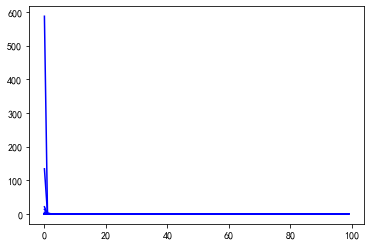

In [25]:
%%time
study = optuna.create_study(direction='minimize')
study.optimize(run, n_trials=100)

In [26]:
best_params = study.best_params
best_params

{'batch_size': 32,
 'epochs': 80,
 'learning_rate': 0.0012798558717290274,
 'optimizer': tensorflow.python.keras.optimizer_v2.adam.Adam,
 'units': 490}

In [27]:
best_value=study.best_value
best_value

272.5938197362607

In [28]:
df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
display(df)
df.to_csv('490_CNN_q=点预测_100次tail_无Dropout层的超参数确定实验结果.csv')

,number,value,params_batch_size,params_epochs,params_learning_rate,params_optimizer,params_units,state
0,0,539.476772,256,100,0.529680,<class 'tensorflow.python.keras.optimizer_v2.a...,25,COMPLETE
1,1,276.129242,512,100,0.017390,<class 'tensorflow.python.keras.optimizer_v2.a...,160,COMPLETE
2,2,310.134771,8,70,0.034777,<class 'tensorflow.python.keras.optimizer_v2.a...,35,COMPLETE
3,3,538.888954,512,20,0.352208,<class 'tensorflow.python.keras.optimizer_v2.a...,240,COMPLETE
4,4,621.175808,32,70,0.331597,<class 'tensorflow.python.keras.optimizer_v2.a...,65,COMPLETE
...,...,...,...,...,...,...,...,...
95,95,272.760854,32,80,0.001136,<class 'tensorflow.python.keras.optimizer_v2.a...,480,COMPLETE
96,96,272.772467,32,90,0.001367,<class 'tensorflow.python.keras.optimizer_v2.a...,460,COMPLETE
97,97,542.822835,64,80,0.264847,<class 'tensorflow.python.keras.optimizer_v2.a...,445,COMPLETE
98,98,274.504521,128,90,0.001010,<class 'tensorflow.python.keras.optimizer_v2.a...,140,COMPLETE


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.



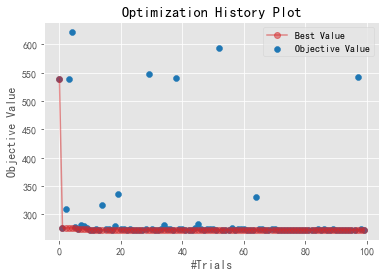

In [29]:
plot_optimization_history(study);

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



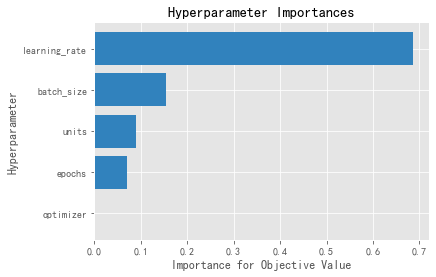

In [30]:
plot_param_importances(study);